In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]

In [102]:
with open('Results/expsmootEndog.npy','rb') as f:
    data = np.load(f)
x = data.squeeze()

In [154]:
smoothing_level = 0.02242732830031289
smoothing_trend = None
smoothing_seasonal = 4.93552304628974e-08
damping_trend = None
initial_level =0.7360047690491268
initial_trend =None
initial_seasons = [-0.61733107, -0.62938417, -0.62722512,  0.80063055, -0.29192828,
        -0.57103026, -0.56761676, -0.48905939,  0.14003335,  1.40010126,
         0.58676564, -0.22433257, -0.61404854, -0.62983029, -0.62845976,
         0.60991498, -0.26795383, -0.519875  , -0.50052507, -0.4456927 ,
         0.27700506,  1.54605526,  0.56673454, -0.30492657, -0.60546233,
        -0.63005357, -0.62554879,  0.56411956, -0.24986267, -0.44443702,
        -0.45150611, -0.38137487,  0.23363538,  1.31291845,  0.51956564,
        -0.18239232, -0.62723698, -0.62871455, -0.61882172,  0.21556779,
         0.7707258 ,  1.98389018,  0.65294392,  0.93290497,  0.40393486,
         0.6433563 ,  0.29817115, -0.28370082, -0.62885701, -0.63079478,
        -0.62002564,  0.04816734,  0.68313293,  0.8486591 ,  0.50789389,
         0.816992  ,  0.26763765,  0.8075894 ,  0.27409654, -0.30507274,
        -0.60981831, -0.6308351 , -0.62524503,  0.69708505, -0.29682969,
        -0.47232816, -0.5328117 , -0.46836094,  0.05233298,  1.27190546,
         0.54102603, -0.33705982, -0.62428996, -0.63033953, -0.62677815,
         0.58767786, -0.36902816, -0.53579927, -0.55965168, -0.49602453,
         0.24346845,  1.35853332,  0.47798489, -0.26064737]
use_boxcox =False
lamda =None
remove_bias =False

In [115]:
#OG wervision
alpha = smoothing_level
beta = smoothing_trend
gamma = smoothing_seasonal
phi = damping_trend

h = 100

m = 12*7
phi =  1.0
beta = 0

x = data.squeeze()


alphac = 1 - alpha
betac = 1 - beta if beta is not None else 0
gammac = 1 - gamma if gamma is not None else 0

s = np.zeros((len(data) + h + 1,))
b = np.zeros((len(data) + h + 1,))
c = np.zeros((len(data) + h + m + 1,))

s[0] = initial_level
b[0] = 0#initial_trend
c[:m] = initial_seasons
phi_h = np.cumsum(phi ** np.arange(1, h + 1 + 1))

nobs = len(data)

for i in range(1, nobs + 1):
    s[i] = alpha * (x[i - 1] - c[i - 1]) + alphac * (s[i - 1] + b[i - 1]*phi)
    b[i] = beta * (s[i] - s[i - 1]) + (betac * b[i - 1] * phi)
    c[i + m - 1] = gamma * (x[i - 1] - gamma * (s[i - 1] + b[i - 1] * phi)) + (gammac * c[i - 1])
    
s[nobs:] = s[nobs] #all from nobs = to last value
# if has_trend:
b[:nobs] = b[:nobs] * phi
b[nobs:] = b[nobs] * phi_h
trend = s + b
c[nobs + m - 1 :] = [
    c[(nobs - 1) + j % m] for j in range(h + 1 + 1)
]

fitted = trend + c[:-m]

0.10157698088828225
0.0
[-1.64933439e-02 -1.65661510e-02 -1.39522119e-02  5.69660646e-01
  1.07678404e+00  1.00306445e-01  1.93121728e-01  8.63635098e-01
  7.70382932e-01  4.72767555e-01  9.42478685e-01  5.95510431e-02
 -1.23228220e-02 -1.93298944e-02 -1.78204054e-02  5.82412657e-01
  2.35578418e+00  1.56677867e+00  1.68851163e+00  2.60917595e+00
  5.34848656e-01  1.58697658e+00  6.17290363e-01  1.00584933e-01
 -7.96204973e-03 -1.49744547e-02 -1.86752322e-02  5.21605876e-01
  1.23403320e+00  1.14197067e+00  4.28141048e-01  3.68445778e-01
  3.65779991e-01  1.72163982e+00  7.45560341e-01  8.98970648e-02
 -1.49751965e-02 -5.76039018e-03 -1.24804980e-02  9.38083575e-01
  9.89077152e-01  1.41914197e+00  1.00068012e+00  1.89109869e+00
  4.30197592e-01  1.29575979e-01  1.59535544e+00  8.30119031e-03
 -1.39074446e-02 -1.50438948e-02 -1.42426778e-02  4.09121000e-01
  1.74010810e+00  1.32167030e+00  1.53587050e+00  3.35535691e-01
  4.64478946e-01  1.53242142e+00  3.90521968e-01  1.37143803e-01
 

In [155]:

alpha = smoothing_level
beta = smoothing_trend
gamma = smoothing_seasonal
phi = damping_trend

h = 100

m = 12*7
phi =  0
beta = 0

x = data.squeeze()


alphac = 1 - alpha
betac = 1 - beta if beta is not None else 0
gammac = 1 - gamma if gamma is not None else 0

# s = np.zeros((len(data) + h + 1,))
# s[0] = initial_level
b = np.zeros((len(data) + h + 1,))
c = np.zeros((len(data) + h + m + 1,))

s = [initial_level, 0]
b[0] = initial_trend if initial_trend is not None else 0
c[:m] = initial_seasons
phi_h = np.cumsum(phi ** np.arange(1, h + 1 + 1))

nobs = len(data)

for i in range(1, nobs + 1):
    s[1] = alpha * (x[i - 1] - c[i - 1]) + alphac * (s[0] + b[i - 1]*phi)
    b[i] = beta * (s[1] - s[0]) + (betac * b[i - 1] * phi)
    c[i + m - 1] = gamma * (x[i - 1] - gamma * (s[0] + b[i - 1] * phi)) + (gammac * c[i - 1])

    s[0] = s[1]
    
# s[nobs:] = s[nobs] #all from nobs = to last value
# if has_trend:
b[:nobs] = b[:nobs] * phi
b[nobs:] = b[nobs] * phi_h
trend = s[1] + b
c[nobs + m - 1 :] = [ c[(nobs - 1) + j % m] for j in range(h + 1 + 1)]

fitted = trend + c[:-m]

In [79]:
def predFeature(x, h, m, alpha, beta, gamma, phi, initial_level, initial_trend, initial_seasons):
    alphac = 1 - alpha
    betac = 1 - beta if beta is not None else 0
    gammac = 1 - gamma if gamma is not None else 0

    # s = np.zeros((len(data) + h + 1,))
    # s[0] = initial_level
    b = np.zeros((len(data) + h + 1,))
    c = np.zeros((len(data) + h + m + 1,))

    s = [initial_level, 0]
    b[0] = initial_trend if initial_trend is not None else 0
    c[:m] = initial_seasons
    phi_h = np.cumsum(phi ** np.arange(1, h + 1 + 1))

    nobs = len(x)

    for i in range(1, nobs + 1):
        s[1] = alpha * (x[i - 1] - c[i - 1]) + alphac * (s[0] + b[i - 1]*phi)
        b[i] = beta * (s[1] - s[0]) + (betac * b[i - 1] * phi)
        c[i + m - 1] = gamma * (x[i - 1] - gamma * (s[0] + b[i - 1] * phi)) + (gammac * c[i - 1])

        s[0] = s[1]
        
    # s[nobs:] = s[nobs] #all from nobs = to last value
    # if has_trend:
    b[:nobs] = b[:nobs] * phi
    b[nobs:] = b[nobs] * phi_h
    trend = s[1] + b
    c[nobs + m - 1 :] = [ c[(nobs - 1) + j % m] for j in range(h + 1 + 1)]

    fitted = trend + c[:-m]
    


    return fitted

In [82]:
def f(x,phi):
    return phi*(1+x)

In [200]:
# Fiting for starting params only alfa beta gama i phi to choose
A = np.mean(x[:-(len(x) % m)].reshape(-1,m),axis=1)
s0 = [np.mean(x[np.arange(len(x)) % m == i][:len(A)]-A) for i in range(m)]
b0 = ((x[m:m+m] - x[:m]) / m).mean()

In [201]:
pred = predFeature(x,h,m,alpha,beta,gamma,phi,x[0], b0,s0)[-h:]

In [173]:
with open('Results/expsmootPred100.npy','rb') as f:
    xx = np.load(f)

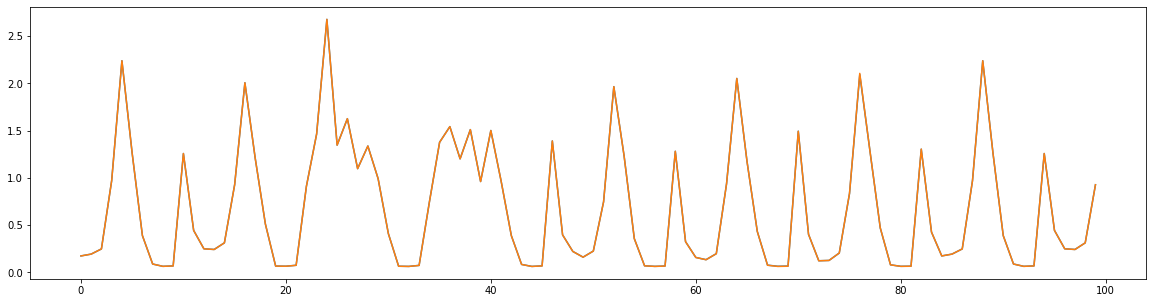

In [202]:
#plt.plot(fitted[-h:])
plt.plot(xx)
plt.plot(pred)